In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

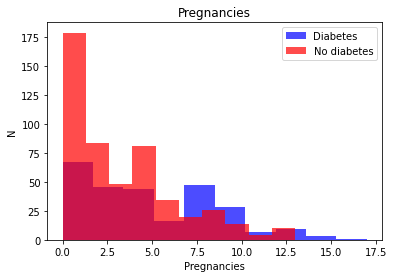

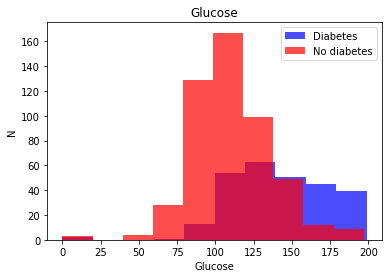

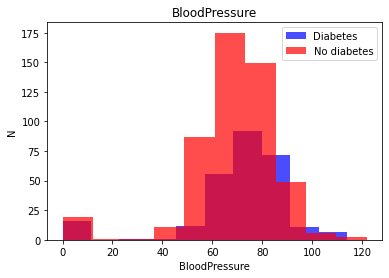

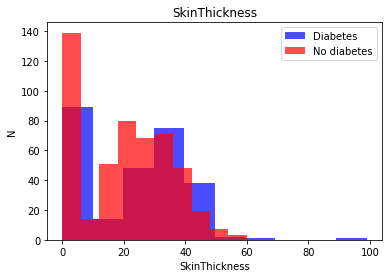

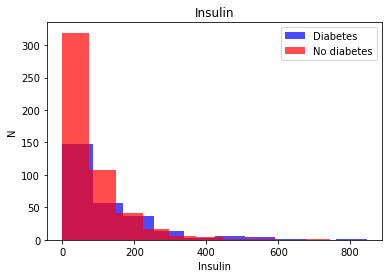

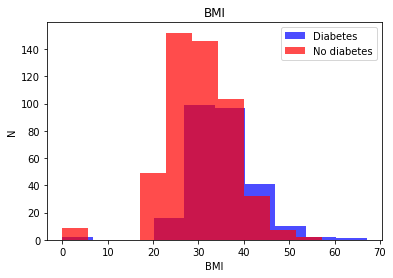

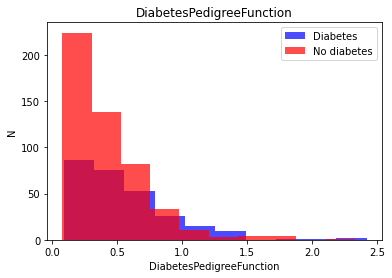

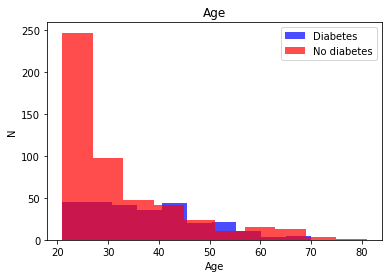

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label='Diabetes',alpha=0.7)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No diabetes",alpha=0.7)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()

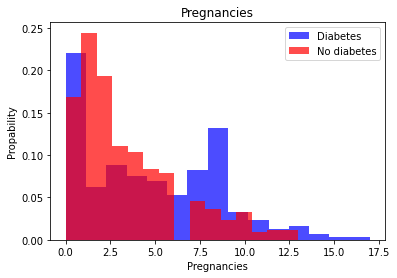

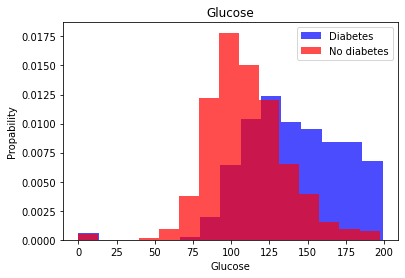

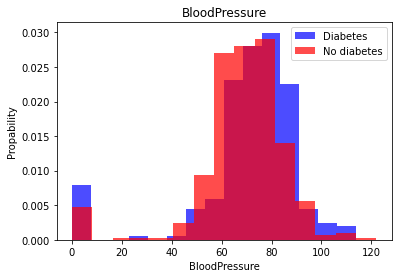

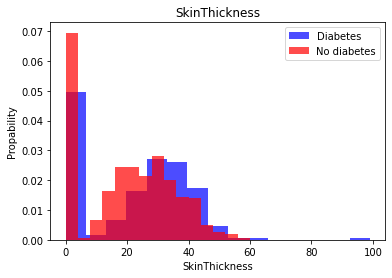

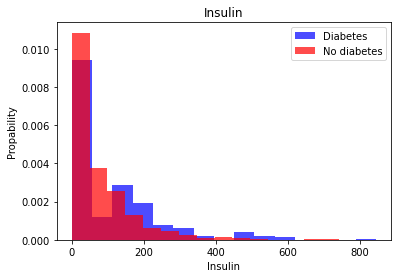

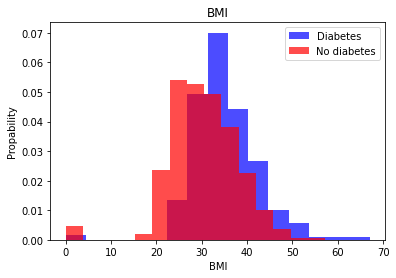

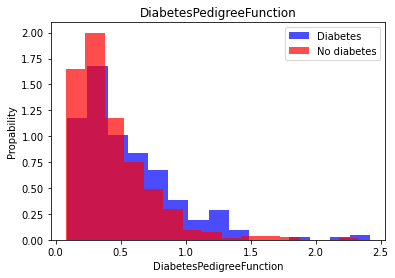

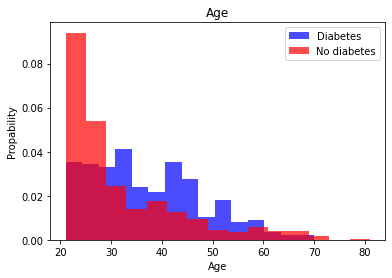

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label='Diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Propability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values


In [ ]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.6978


[0.586405873298645, 0.697826087474823]

In [ ]:
model.evaluate(x_valid,y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.7078


[0.6224946975708008, 0.7077922224998474]

In [ ]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
29/29 [==============================] - 1s 4ms/step - loss: 0.5586 - accuracy: 0.6957 - val_loss: 0.5576 - val_accuracy: 0.7013
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.7196 - val_loss: 0.5510 - val_accuracy: 0.7273
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7370 - val_loss: 0.5595 - val_accuracy: 0.7143
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7043 - val_loss: 0.5528 - val_accuracy: 0.7273
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7261 - val_loss: 0.5503 - val_accuracy: 0.7208
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7413 - val_loss: 0.5565 - val_accuracy: 0.7208
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 0.7326 - val_loss: 0.5541 - val_accuracy: 0.7013
Epoch 8/20
29/29 [==

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

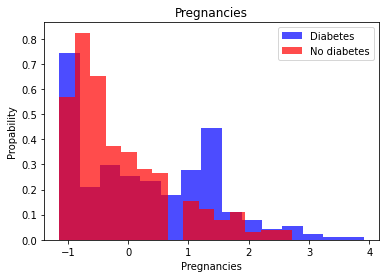

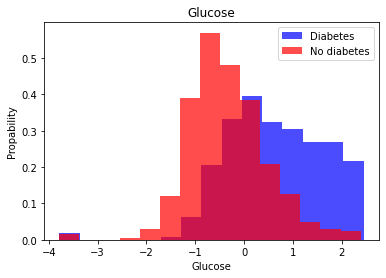

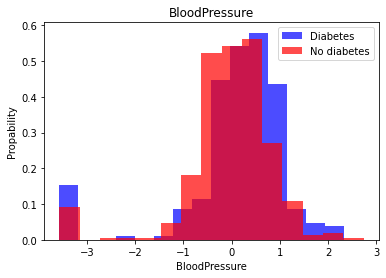

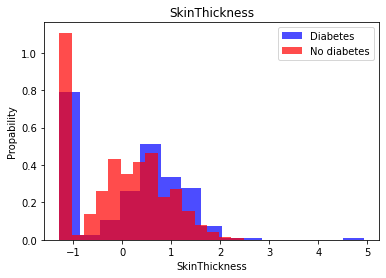

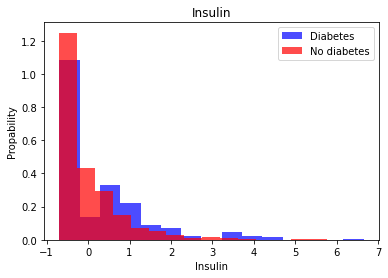

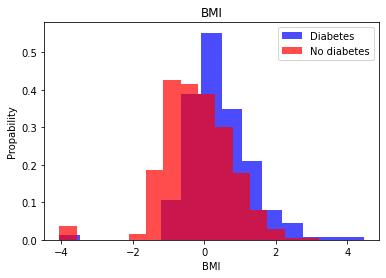

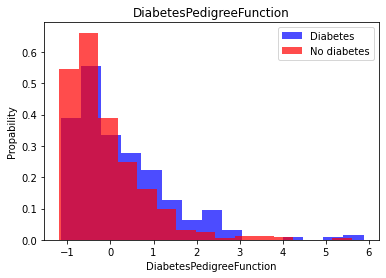

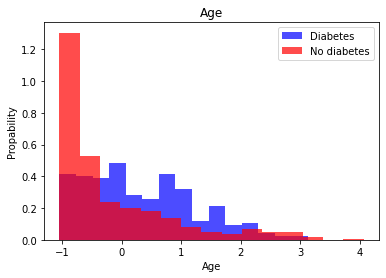

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue',label='Diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label="No diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Propability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [ ]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
29/29 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7826 - val_loss: 0.5904 - val_accuracy: 0.6883
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.4738 - accuracy: 0.7717 - val_loss: 0.5912 - val_accuracy: 0.6753
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7587 - val_loss: 0.6136 - val_accuracy: 0.6948
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.4733 - accuracy: 0.7609 - val_loss: 0.5785 - val_accuracy: 0.6753
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7761 - val_loss: 0.6087 - val_accuracy: 0.6948
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7739 - val_loss: 0.5827 - val_accuracy: 0.6688
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7587 - val_loss: 0.5987 - val_accuracy: 0.6883
Epoch 8/20
29/29 [==

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.6636 - accuracy: 0.7532


[0.6635977029800415, 0.7532467246055603]